In [11]:
import numpy as np
import matplotlib.pyplot as plt
import csv, datetime, random
import matplotlib.dates as mdates

In [12]:
def MakeDataFromText(filepath):
    """
    Helper function to parse text files in IFM proprietary format.
    """
    with open(filepath, 'r') as file:
        reader = csv.reader(file)

        db = dict()                          # Dictionary that will hold k,v pairs of 
        recent_EPC = ''                      # The most recent EPC that was read, and data is being assigned to
        Time_Or_Data = True                  # Time is true, Data is false
        reached_24 = False

        for l in reader:                     # Iterate over entire text file
            line = l[0]                      # Each line only has one token, so we select it
            
            if len(line)==24:                # If it is an EPC
                db[line] = [[],[]]           # Create new k,v pair in database
                recent_EPC = line            # Current EPC to add to is selected
            
            elif line == '[':                # If start bracket, beginning to collect an array of data
                data = []

            elif line == ']':                # End bracket means end of data array
                if len(data)!=0:
                    if Time_Or_Data:
                        db[recent_EPC][0] = data
                        Time_Or_Data = False
                    else:
                        db[recent_EPC][1] = data
                        Time_Or_Data = True
                data = []

            elif len(line)==8:               # If it is a time stamp
                h,m,s = line.split(':')      # Parse timestamp into hours, minutes, seconds

                if int(h)==23:
                    reached_24 = True        # If end of day reached, must move to Day 2

                if reached_24 and int(h) < 12:
                    day=2
                else:
                    day=1

                data.append(datetime.datetime(1970, 2, day, int(h) - 3, int(m), int(s))) # Minus 3 for Pacific Time
            
            elif line ==' ':               # If blank space, then we skip to parse next line
                pass

            else:                          # If it is a data point
                try:
                    data.append(float(line))
                except:
                    pass                   # Error catching case just in case, so annoying errors don't crash program
    return db

class Person:
    """
    Class to represent each individal poutfit being recorded during Deployment, made up of garments.
    """
    def __init__(
        self, wet:bool, Name:str, color:str,
        backneck:str,   back:str,        chest:str, 
        leftab:str,     rightab:str, 
        rightuparm:str, rightlowarm:str, 
        leftuparm:str,  leftlowarm:str, 
        beanie1:str,    beanie2:str,     beanie3:str, beanieR:str, beanieL:str
    ):
        self.Backneck    = backneck        # Tag ID's for the shirt
        self.Back        = back
        self.Chest       = chest
        self.Leftab      = leftab
        self.Rightab     = rightab
        self.Rightuparm  = rightuparm
        self.Rightlowarm = rightlowarm
        self.Leftuparm   = leftuparm
        self.Leftlowarm  = leftlowarm
        self.Beanie1     = beanie1         # Tag ID's for the beanies
        self.Beanie2     = beanie2
        self.Beanie3     = beanie3
        self.BeanieR     = beanieR
        self.BeanieL     = beanieL

        self.Name = Name                   # Soldier's Name

        self.ShirtMapping = {
            self.Backneck:    Name + " Back Neck",
            self.Back:        Name + " Back",
            self.Chest:       Name + " Chest",
            self.Leftab:      Name + " Left Abdomen",
            self.Rightab:     Name + " Right Abdomen",
            self.Rightuparm:  Name + " Right Upper Arm",
            self.Rightlowarm: Name + " Right Lower Arm",
            self.Leftlowarm:  Name + " Left Lower Arm",
            self.Leftuparm:   Name + " Left Upper Arm",
        }

        self.TagList = [
            self.Backneck,   self.Back, self.Chest,
            self.Leftab,     self.Rightab,
            self.Rightuparm, self.Rightlowarm,
            self.Leftuparm,  self.Leftlowarm,
            self.Beanie1,    self.Beanie2, self.Beanie3, self.BeanieR, self.BeanieL
        ]

        self.BeanieList = [self.Beanie1, self.Beanie2, self.Beanie3, self.BeanieR, self.BeanieL]
        self.Color = color

        self.wet = wet # Bool for wetness check
        if wet:
            self.BackColor = "#870101"
            self.BackNeckColor = "#ad4503"
            self.ChestColor = "#756a01"
            self.LeftAbColor = "#396102"
            self.RightAbColor = "#015c0b"
            self.LeftUpArmColor = "#01663f"
            self.RightUpArmColor = "#00a191"
            self.LeftLowArmColor = "#012173"
            self.RightLowArmColor = "#1e075e"
            
        else:
            self.BackColor = "#ff0d0d"
            self.BackNeckColor = "#ff7214"
            self.ChestColor = "#d1bc02"
            self.LeftAbColor = "#6bb803"
            self.RightAbColor = "#01bf16"
            self.LeftUpArmColor = "#03c278"
            self.RightUpArmColor = "#06b4cf"
            self.LeftLowArmColor = "#0443e0"
            self.RightLowArmColor = "#4c05e6"

In [13]:
cr = MakeDataFromText("MWTC/baseline_classroom.txt")

In [14]:
person1  = Person(True, "", "", "438F", "1D6C", "458B", "3D0D", "7B11", "0843", "4BA9", "56A4", "A268", "4E72", "5A88", "7342", "5481", "8839");
person2  = Person(True, "","saddlebrown", "333B", "289B", "2473", "231D", "9879", "4067", "5FB6", "169E", "8D50", "74C4", "73DC", "DC4A", "884D", "1BA4");
person3  = Person(True, "","", "886B", "47D0", "AE3E", "7645", "103F", "7E6F", "64C0", "2887", "8915", "6765", "A27E", "0C71", "7508", "A8BE");
person4  = Person(True, "","", "9854", "A3B0", "9EC6", "9A91", "343B", "87D4", "81D4", "8A53", "1397", "A467", "4191", "4F07", "2966", "7B7F");
person5  = Person(True, "","", "777F", "67DB", "184A", "885D", "71CF", "BA4C", "8FA9", "B6A1", "2C97", "91A6", "9B91", "6382", "79D1", "1748");
person6  = Person(True, "","black", "71BB", "7705", "B25E", "3247", "A9B5", "6C38", "7662", "A983", "098F", "B644", "7BCC", "B576", "70D1", "4D84");
person7  = Person(True, "","", "6023", "4BAC", "8988", "668B", "B77F", "B0A7", "8062", "7648", "5189", "7033", "1B39", "9643", "9C6D", "A53C");
person8  = Person(True, "","", "1B6A", "0D42", "7AD4", "20AF", "493F", "404A", "6878", "1A3B", "546F", "194B", "3133", "A847", "0D50", "7A61");
person9  = Person(True, "","", "1A91", "463C", "5199", "0483", "6003", "9F30", "334C", "9877", "5734", "B384", "42A9", "149C", "3991", "5C23");
person10 = Person(True, "","", "366C", "A08B", "AC42", "9AC9", "B53F", "76A4", "5E76", "68AE", "41D6", "803F", "5757", "9E54", "----", "----");
person11 = Person(True, "","", "2A1B", "238C", "731F", "9591", "5C98", "5F06", "4526", "461C", "5253", "B078", "3AC7", "566B", "65D4", "432B");
person12 = Person(True,"", "", "87C3", "38D7", "A86F", "637A", "552E", "A34A", "9436", "7FAC", "0C90", "1168", "0F7A", "0068", "175B", "746D");
person13 = Person(True, "","mediumseagreen", "A033", "A0C0", "892F", "627F", "6BD9", "3DB0", "8C97", "4ECF", "A73C", "90AE", "78D3", "82D8", "312D", "2A29");
person14 = Person(True, "","darkturquoise", "462C", "5B60", "7415", "6310", "1851", "616A", "5DAA", "6D28", "9991", "3B0E", "5374", "682C", "0A50", "1543");
person15 = Person(True,"", "midnightblue", "9C54", "9968", "65E1", "5E23", "ACB3", "7AD3", "99A1", "B19D", "43C6", "7DCB", "9D35", "6FD0", "34CE", "62E3");
person16 = Person(True,"", "crimson", "959E", "1C5F", "5A59", "077A", "902A", "3B60", "8199", "4469", "813A", "B7A4", "5163", "4DA5", "8995", "7972");
person17 = Person(True,"", "cornflowerblue", "6CC7", "8FB7", "799D", "6F8D", "6332", "5A1E", "92A5", "4A3D", "3EC9", "16AB", "A66C", "6162", "A686", "7E1B");
person18 = Person(True,"", "", "B43E", "19B1", "AEA6", "9152", "59D6", "3060", "7491", "893F", "38C3", "1C81", "A49F", "137F", "AB34", "A82F");
person19 = Person(True,"", "maroon", "697F", "78A5", "5D0E", "7EC6", "AE59", "8158", "4A9B", "1D44", "2122", "5C02", "2D90", "6DAB", "3374", "B1AB");
person20 = Person(True,"", "forestgreen", "84B5", "A02C", "0A80", "787B", "83D5", "77DB", "9FA0", "6EC4", "AF3F", "963D", "A79C", "0E4D", "7A91", "460A");
person21 = Person(True,"", "", "8CB4", "4115", "4D74", "4883", "4C9F", "ABB7", "7938", "390F", "21A5", "A697", "7C7D", "B689", "114D", "047A");
person22 = Person(True,"", "", "4F0D", "90D5", "0874", "45CE", "6CAC", "3EB2", "A26F", "888C", "50C3", "3767", "664F", "36A4", "2759", "BB8B");
person23 = Person(True,"", "", "0C7F", "8A16", "57DF", "350F", "46BC", "0A89", "2D1F", "55D6", "7961", "2290", "798F", "B35B", "813B", "027B");
person24 = Person(True, "","", "22A0", "746B", "8E41", "933B", "BB81", "39AF", "4436", "826D", "8DBC", "9272", "862E", "3276", "58D6", "2858");
person25 = Person(True, "","darkorange", "205E", "9A88", "9F3D", "6F32", "1F74", "51B0", "AD80", "3277", "1E53", "894A", "A258", "3434", "82D3", "51DF");
person26 = Person(True,"", "red", "4813", "2791", "1F7A", "6F4A", "2383", "2F66", "2E5C", "926A", "2E56", "158F", "5B06", "B28A", "73C6", "819C");
person27 = Person(True,"", "", "2FA1", "93BD", "913C", "3CD0", "2033", "A071", "3A3A", "7A7E", "9993", "5260", "3E8A", "B55B", "258F", "158E");
person28 = Person(True,"", "violet", "8977", "4EB3", "AA5E", "6626", "9ABE", "6CD0", "AB8E", "14AA", "6E94", "895D", "571F", "2D68", "8121", "198C");
person29 = Person(True,"", "", "1466", "75C7", "54C4", "A489", "814C", "155D", "5221", "4293", "5F0A", "703F", "9FBF", "8D33", "3416", "3DB7");
person30 = Person(True,"", "", "8339", "6E37", "3546", "686E", "0D9F", "9E2A", "4131", "B647", "8A97", "B690", "A688", "9647", "44D6", "94CB");
person31 = Person(True,"", "", "1CAE", "7764", "8F24", "AD3E", "8898", "413F", "097A", "18A8", "4258", "7F4E", "801E", "8651", "AAB4", "6CB5");
person32 = Person(True, "","gold", "2990", "1EC3", "51E2", "3783", "AE5E", "4575", "0688", "A0B0", "1BA6", "3C3E", "1989", "7C2C", "42D7", "6129");

In [15]:
personlist = [
    person1, person2, person3, person4, person5, person6, person7, person8, person9, person10, person11, person12, person13, person14, person15, person16, person17, person18, person19, person20, person21, person22, person23, person24, person25, person26, person27, person28, person29, person30, person31, person32
]

In [21]:
counts = []
temps = []
for person in personlist:
    for k,v in cr.items():
        if k[-4:] in person.TagList:
            for i in v[1]:
                temps.append(i)
    counts.append(temps)
    temps = []

# for j in range(len(counts)):
#     print(j+1, round(np.mean(counts[j]),2), len(counts[j]))

for a,b in zip( sorted([len(i) for i in counts]), np.argsort([len(i) for i in counts]) ):
    print("p ", b, "numreads: ", a, "mean temp: ", round(np.mean(counts[b]),2))

p  20 numreads:  0 mean temp:  nan
p  28 numreads:  0 mean temp:  nan
p  8 numreads:  0 mean temp:  nan
p  18 numreads:  0 mean temp:  nan
p  10 numreads:  0 mean temp:  nan
p  26 numreads:  0 mean temp:  nan
p  25 numreads:  0 mean temp:  nan
p  22 numreads:  1 mean temp:  18.1
p  7 numreads:  1 mean temp:  17.5
p  21 numreads:  2 mean temp:  18.84
p  31 numreads:  3 mean temp:  28.77
p  29 numreads:  4 mean temp:  17.78
p  3 numreads:  4 mean temp:  26.86
p  9 numreads:  5 mean temp:  17.75
p  6 numreads:  7 mean temp:  19.37
p  16 numreads:  12 mean temp:  31.08
p  14 numreads:  17 mean temp:  27.47
p  1 numreads:  26 mean temp:  26.42
p  4 numreads:  31 mean temp:  29.6
p  19 numreads:  58 mean temp:  23.33
p  15 numreads:  74 mean temp:  20.78
p  27 numreads:  76 mean temp:  22.28
p  0 numreads:  76 mean temp:  23.05
p  5 numreads:  145 mean temp:  21.64
p  11 numreads:  168 mean temp:  19.16
p  24 numreads:  290 mean temp:  22.98
p  12 numreads:  973 mean temp:  24.21
p  17 numre

In [17]:
Back_im_sum1 = []; Back_im_time1 = []; Back_im_sum2 = []; Back_im_time2 = []; Back_im_sum3 = []; Back_im_time3 = []
Neck_im_sum1 = []; Neck_im_time1 = []; Neck_im_sum2 = []; Neck_im_time2 = []; Neck_im_sum3 = []; Neck_im_time3 = []
chst_im_sum1 = []; chst_im_time1 = []; chst_im_sum2 = []; chst_im_time2 = []; chst_im_sum3 = []; chst_im_time3 = []
b1_im_sum1 = []; b1_im_time1 = []; b1_im_sum2 = []; b1_im_time2 = []; b1_im_sum3 = []; b1_im_time3 = []
b2_im_sum1 = []; b2_im_time1 = []; b2_im_sum2 = []; b2_im_time2 = []; b2_im_sum3 = []; b2_im_time3 = []
b3_im_sum1 = []; b3_im_time1 = []; b3_im_sum2 = []; b3_im_time2 = []; b3_im_sum3 = []; b3_im_time3 = []
bL_im_sum1 = []; bL_im_time1 = []; bL_im_sum2 = []; bL_im_time2 = []; bL_im_sum3 = []; bL_im_time3 = []
bR_im_sum1 = []; bR_im_time1 = []; bR_im_sum2 = []; bR_im_time2 = []; bR_im_sum3 = []; bR_im_time3 = []
lab_im_sum1 = []; lab_im_time1 = []; lab_im_sum2 = []; lab_im_time2 = []; lab_im_sum3 = []; lab_im_time3 = []
rab_im_sum1 = []; rab_im_time1 = []; rab_im_sum2 = []; rab_im_time2 = []; rab_im_sum3 = []; rab_im_time3 = []
larm_im_sum1 = []; larm_im_time1 = []; larm_im_sum2 = []; larm_im_time2 = []; larm_im_sum3 = []; larm_im_time3 = []
rarm_im_sum1 = []; rarm_im_time1 = []; rarm_im_sum2 = []; rarm_im_time2 = []; rarm_im_sum3 = []; rarm_im_time3 = []
low_im_sum1 = []; low_im_time1 = []; low_im_sum2 = []; low_im_time2 = []; low_im_sum3 = []; low_im_time3 = []
row_im_sum1 = []; row_im_time1 = []; row_im_sum2 = []; row_im_time2 = []; row_im_sum3 = []; row_im_time3 = []


##############################
### GETTING WET SHIRT DATA ###
##############################
for k,v in cr.items():
    id = k[-4:]


    for p in personlist:
        if id in p.TagList:

            if id==p.Back:
                for i in v[1]:
                    Back_im_sum1.append(i)
            elif id==p.Backneck:
                for i in v[1]:
                    Neck_im_sum1.append(i)
            elif id==p.Chest:
                for i in v[1]:
                    chst_im_sum1.append(i)
            elif id==p.Leftuparm:
                for i in v[1]:
                    larm_im_sum1.append(i)
            elif id==p.Rightuparm:
                for i in v[1]:
                    rarm_im_sum1.append(i)
            elif id==p.Leftlowarm:
                for i in v[1]:
                    low_im_sum1.append(i)
            elif id==p.Rightlowarm:
                for i in v[1]:
                    row_im_sum1.append(i)
            elif id==p.Leftab:
                for i in v[1]:
                    lab_im_sum1.append(i)
            elif id==p.Rightab:
                for i in v[1]:
                    rab_im_sum1.append(i)
            elif id==p.Beanie1:
                for i in v[1]:
                    b1_im_sum1.append(i)
            elif id==p.Beanie2:
                for i in v[1]:
                    b2_im_sum1.append(i)
            elif id==p.Beanie3:
                for i in v[1]:
                    b3_im_sum1.append(i)
            elif id==p.BeanieL:
                for i in v[1]:
                    bL_im_sum1.append(i)
            elif id==p.BeanieR:
                for i in v[1]:
                    bR_im_sum1.append(i)

print('back', round(np.mean(Back_im_sum1),2), round(np.std(Back_im_sum1), 2), len(Back_im_sum1))
print('neck', round(np.mean(Neck_im_sum1),2), round(np.std(Neck_im_sum1), 2), len(Neck_im_sum1))
print('left up arm', round(np.mean(larm_im_sum1),2), round(np.std(larm_im_sum1), 2), len(larm_im_sum1))
print('left low arm', round(np.mean(low_im_sum1),2), round(np.std(low_im_sum1), 2), len(low_im_sum1))
print('right up arm', round(np.mean(rarm_im_sum1),2), round(np.std(rarm_im_sum1), 2), len(rarm_im_sum1))
print('right low arm', round(np.mean(row_im_sum1),2), round(np.std(row_im_sum1), 2), len(row_im_sum1))
print('left ab', round(np.mean(lab_im_sum1),2), round(np.std(lab_im_sum1), 2), len(lab_im_sum1))
print('right ab', round(np.mean(rab_im_sum1),2), round(np.std(rab_im_sum1), 2), len(rab_im_sum1))
print('chest', round(np.mean(chst_im_sum1),2), round(np.std(chst_im_sum1), 2), len(chst_im_sum1))
print('beanie1', round(np.mean(b1_im_sum1),2), round(np.std(b1_im_sum1), 2), len(b1_im_sum1))
print('beanie2', round(np.mean(b2_im_sum1),2), round(np.std(b2_im_sum1), 2), len(b2_im_sum1))
print('beanie3', round(np.mean(b3_im_sum1),2), round(np.std(b3_im_sum1), 2), len(b3_im_sum1))
print('beanieL', round(np.mean(bL_im_sum1),2), round(np.std(bL_im_sum1), 2), len(bL_im_sum1))
print('beanieR', round(np.mean(bR_im_sum1),2), round(np.std(bR_im_sum1), 2), len(bR_im_sum1))

back 26.85 4.63 1595
neck 30.31 3.89 157
left up arm 20.84 3.08 947
left low arm 26.86 4.39 30
right up arm 25.44 4.19 9216
right low arm 26.55 4.81 122
left ab 27.54 5.58 748
right ab 25.36 6.15 3988
chest 26.8 2.9 85
beanie1 22.97 0.99 5399
beanie2 22.78 0.92 4636
beanie3 22.91 1.47 4409
beanieL 22.63 1.3 2950
beanieR 22.78 0.93 1441


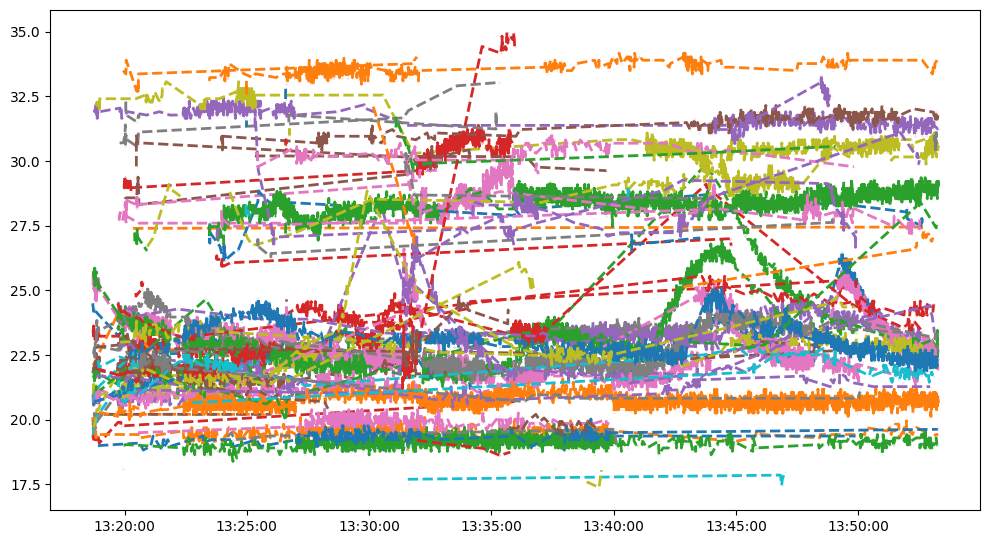

In [18]:
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%H:%M:%S')
fig, ax = plt.subplots(figsize=(12, 6.5))
ax.xaxis.set_major_formatter(myFmt)

count = 0
for k,v in cr.items():
    ax.plot(v[0], v[1], marker='o', linestyle='dashed', linewidth=2, markersize=0.1)